In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt 
import numpy as np 

## Importiamo il DataSet "mnist" da keras 

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path='mnist.npz')


In [3]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


## Vediamo le nostre prime 10 immagini del DataSet

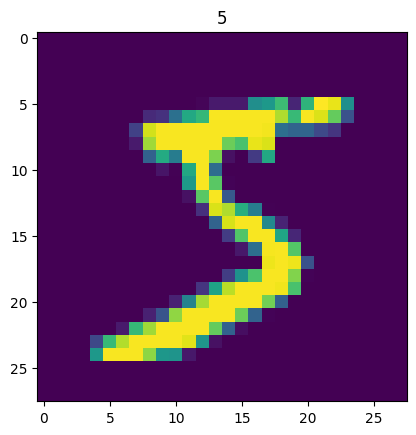

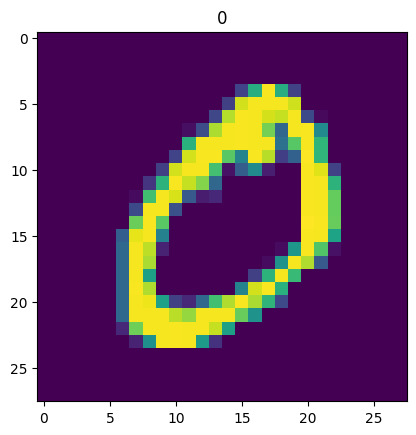

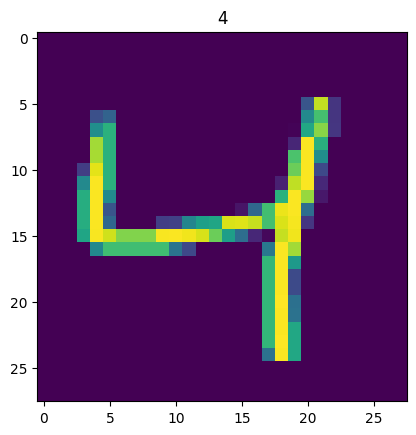

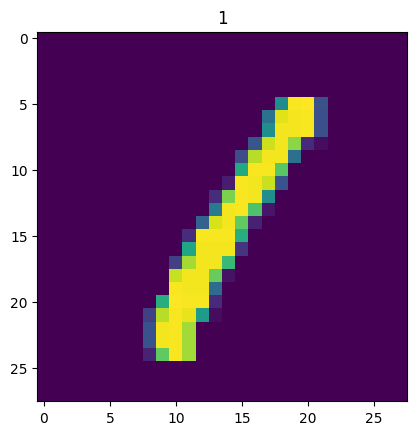

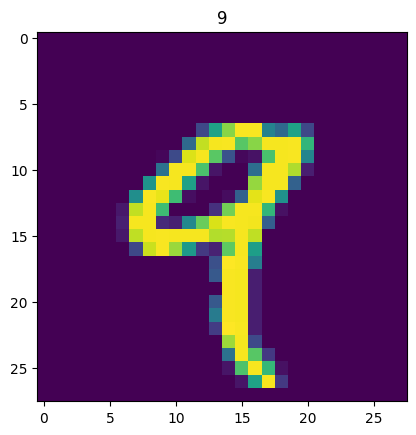

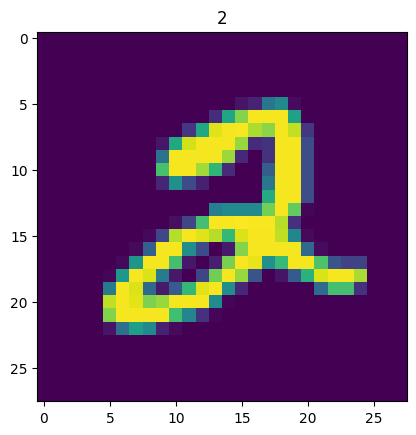

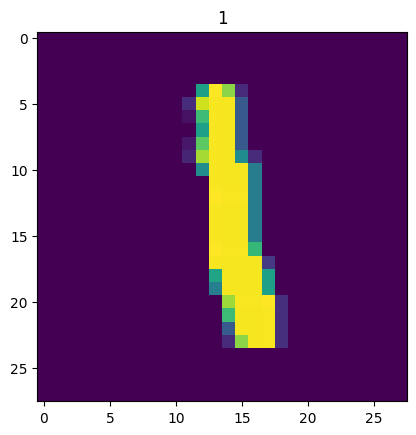

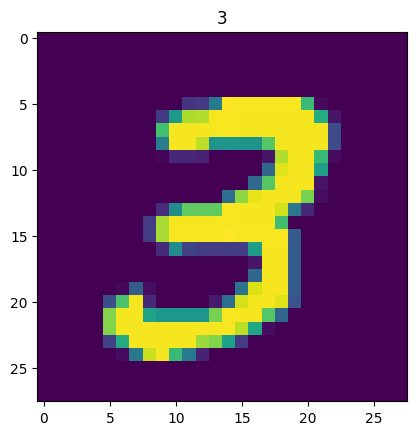

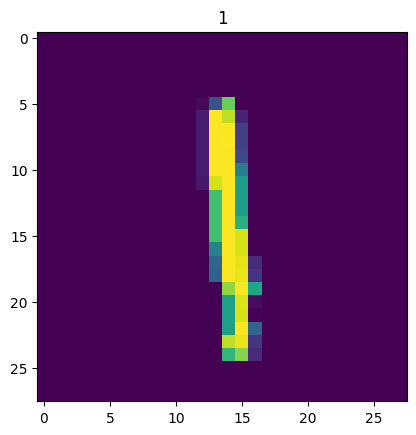

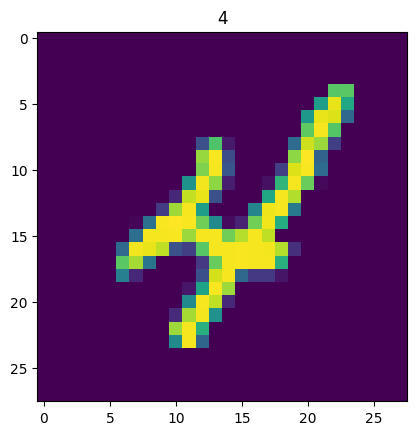

In [4]:
for i in range(10):
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.show()

* Normalizziamo i dati delle immagini (essendo immagini in bianco e nero li dividiamo per il numero delle scale dei grigi ossia 255)
* Appiattiamo ogni immagine da un array 28 * 28 ad un array di 784 pxl


In [5]:
train_images = (train_images / 255)
test_images = (test_images / 255)

train_images = train_images.reshape((-1 , 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


* Trasformiamo le labels delle nostre immagini con la codifica hot-encoding 

In [6]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


print(train_labels[41])

print(train_images.shape)
print(test_images.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(60000, 784)
(10000, 784)


## Creiamo il Modello 
* Ogni model.add aggiungiamo layer alla nostra rete
* Con Dense gli diciamo la tipologia del modello (Con Dense indichiamo una cella collegata direttamente con tutte le altre celle successive)
* 64 numero di celle 
* activation = funzione di attivazione

In [12]:
model = Sequential()
model.add(Dense(64, activation= 'relu', input_shape=(784,)))
model.add(Dense(64, activation= 'relu',))
model.add(Dense(10, activation= 'softmax',))

## Compilazione del modello 

In [13]:
model.compile(
    optimizer= Adam(learning_rate = 0.005),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## Addestramento del modello 
* loss = Funzione di costo 
* batch_size = ogni quanti dati aggiornare i parametri dell modello 

In [15]:
history = model.fit(
    x=train_images, # training dataset
    y=train_labels, # training labels
    epochs=10,
    batch_size=250,
    validation_data=(
        test_images, # testing dataset
        test_labels  # testing labels
    )
)

Epoch 1/10
240/240 [==============================] - 2s 5ms/step - loss: 0.2833 - accuracy: 0.9162 - val_loss: 0.1523 - val_accuracy: 0.9540
Epoch 2/10
240/240 [==============================] - 1s 4ms/step - loss: 0.1276 - accuracy: 0.9614 - val_loss: 0.1378 - val_accuracy: 0.9580
Epoch 3/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0953 - accuracy: 0.9709 - val_loss: 0.1222 - val_accuracy: 0.9628
Epoch 4/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0750 - accuracy: 0.9769 - val_loss: 0.0971 - val_accuracy: 0.9698
Epoch 5/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0668 - accuracy: 0.9796 - val_loss: 0.0943 - val_accuracy: 0.9718
Epoch 6/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0559 - accuracy: 0.9821 - val_loss: 0.1171 - val_accuracy: 0.9660
Epoch 7/10
240/240 [==============================] - 1s 4ms/step - loss: 0.0460 - accuracy: 0.9851 - val_loss: 0.0924 - val_accuracy: 0.9727
Epoch 

In [ ]:
print(train_images.shape)
print(train_labels.shape)

## Grafici che mostrano le performance del modello con i dati di loss e acc 

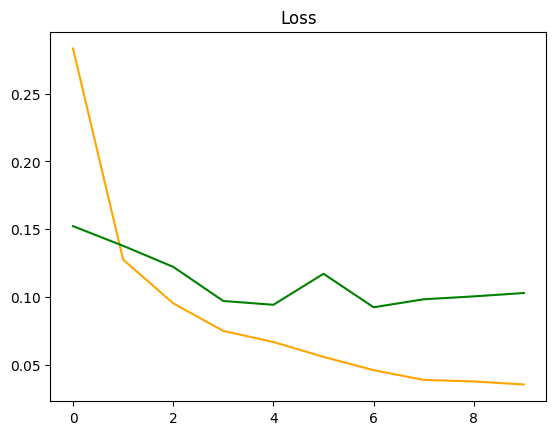

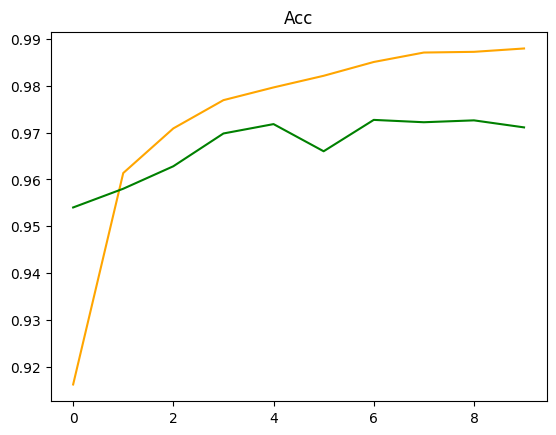

In [16]:
plt.plot(history.history['loss'], color= 'orange')
plt.plot(history.history['val_loss'], color = 'green')
plt.title('Loss')
plt.show()

plt.plot(history.history['accuracy'], color='orange')
plt.plot(history.history['val_accuracy'], color='green')
plt.title('Acc')
plt.show()

* Loss e acc del modello 

In [19]:
model.evaluate(
  test_images,
  test_labels
)

313/313 [==============================] - 1s 1ms/step - loss: 0.1029 - accuracy: 0.9711


[0.10294687747955322, 0.9710999727249146]

* Predizione del modello 

In [20]:
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis=1))
print(np.argmax(test_labels[:5], axis =1))

1/1 [==============================] - 0s 85ms/step
[7 2 1 0 4]
[7 2 1 0 4]
